<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS**

## **1 Inizializzazione**

In [143]:
import networkx as nx
import pandas as pd
import seaborn as sns
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import collections
warnings.filterwarnings('ignore')

In [39]:
%matplotlib inline 

In [119]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [70]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [71]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [140]:
grado = dict(G.degree())
gradi = list(grado.values())
nodes = list(G.nodes)
densita = nx.density(G)

In [101]:
print("NODES: ", len(G.nodes))
print("EDGES: ", len(G.edges))
print("RAGGIO: ", nx.radius(G))
print("DIAMETRO: ", nx.diameter(G))
print("DENSITY: ", nx.density(G))
print("IS_CONNECTED: ", nx.is_connected(G))
print("CLUSTERING: ", nx.average_clustering(G))
print("N. OF CYCLE: ",len(nx.cycle_basis(G)))

NODES:  198
EDGES:  2742
RAGGIO:  4
DIAMETRO:  6
DENSITY:  0.14059375480695277
IS_CONNECTED:  True
CLUSTERING:  0.6174507021536301
N. OF CYCLE:  2545


In [74]:
pos = nx.spring_layout(G)
posc = nx.circular_layout(G)
posk = nx.kamada_kawai_layout(G)
poss = nx.spiral_layout(G)

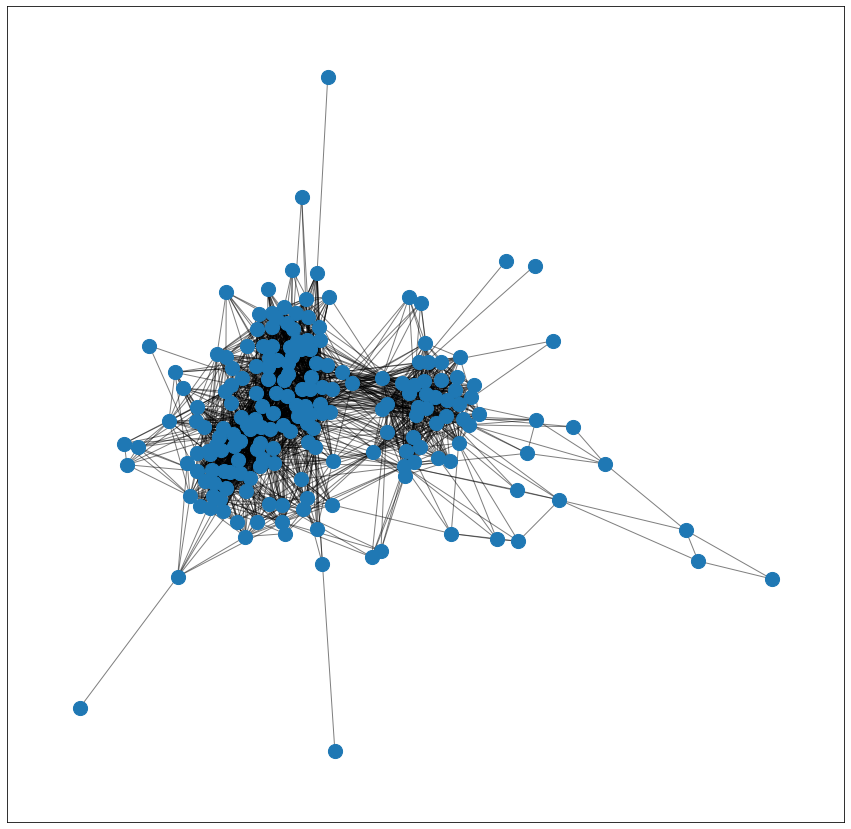

In [75]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

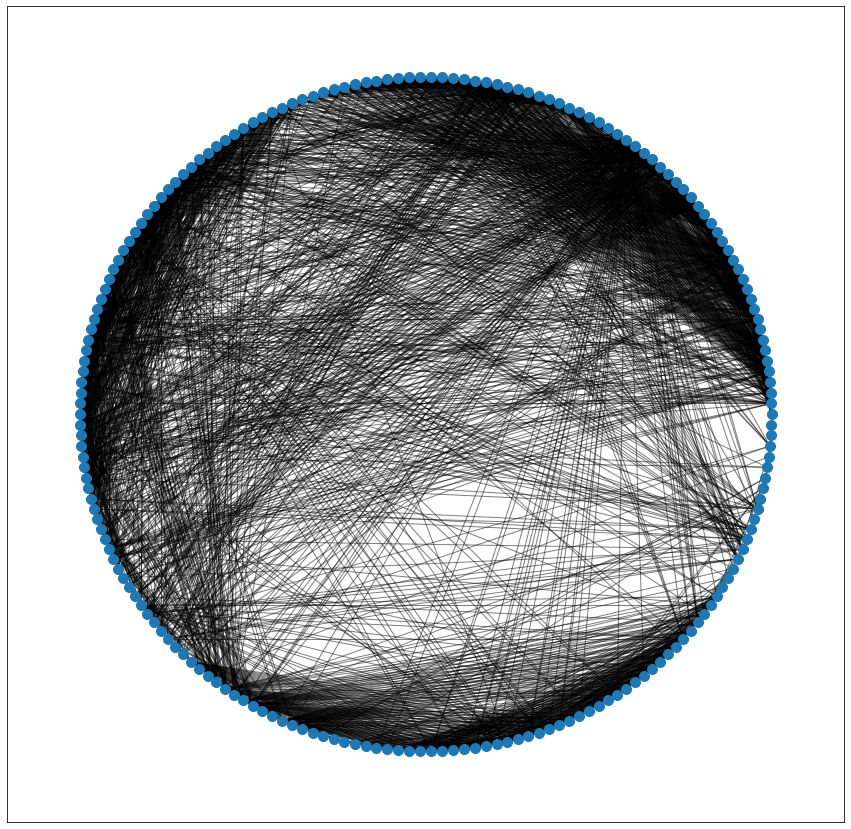

In [62]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posc, node_size=100)
nx.draw_networkx_edges(G, pos=posc, alpha=0.5)
plt.show()

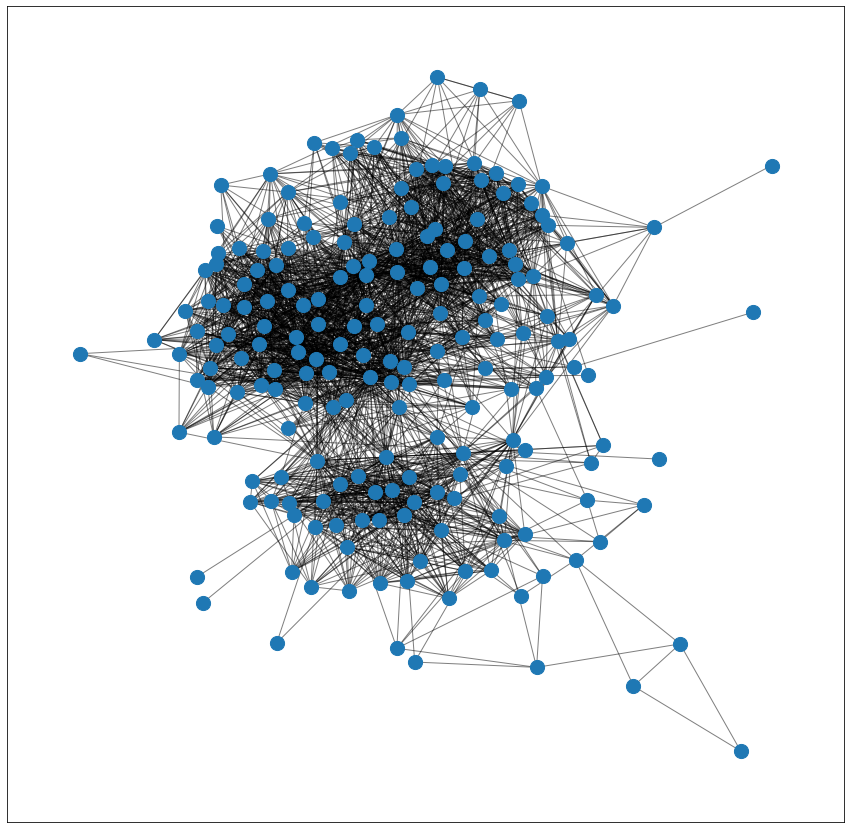

In [63]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posk, node_size=200)
nx.draw_networkx_edges(G, pos=posk, alpha=0.5)
plt.show()

### **1.1 Analisi del Grado**

In [142]:
print('Standard deviation: {}'.format(np.std(gradi)))
print('Mean: {}'.format(np.mean(gradi)))
print('Median: {}'.format(np.median(gradi)))
print('Min: {}'.format(np.min(gradi)))
print('Max: {}'.format(np.max(gradi)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 17.41035019313416
Mean: 27.696969696969695
Median: 25.0
Min: 1
Max: 100
Assortativity coefficient: 0.020237399275047713


Text(0.5, 0, 'Degree')

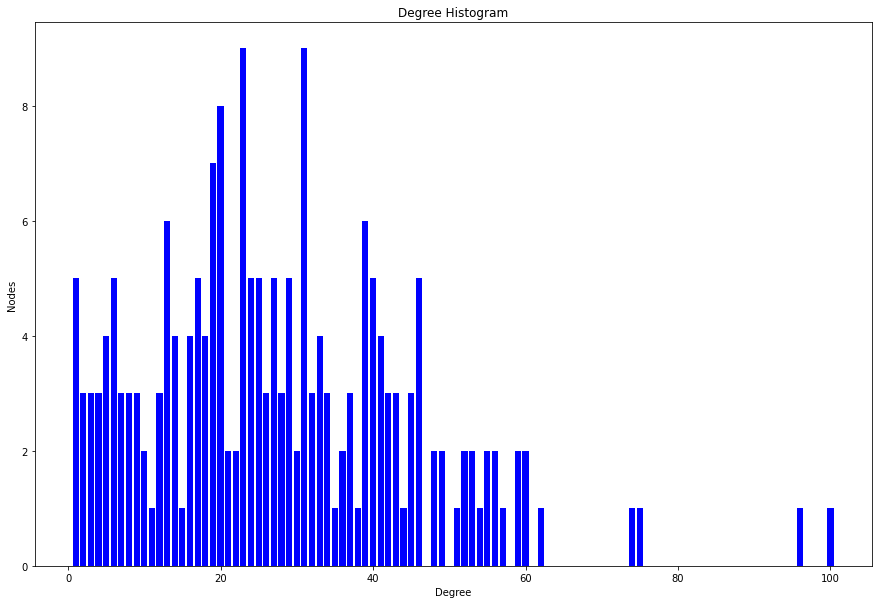

In [144]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(15,10))

plt.bar(deg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Nodes")
plt.xlabel("Degree")

## **2 Centralità**

### **2.1 Degree Centrality**

Quanti neighbors ha ciascun nodo?

In [106]:
ranks = [(k, v) for k, v in sorted(grado.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 100), ('7', 96), ('20', 75), ('23', 74), ('90', 62)]

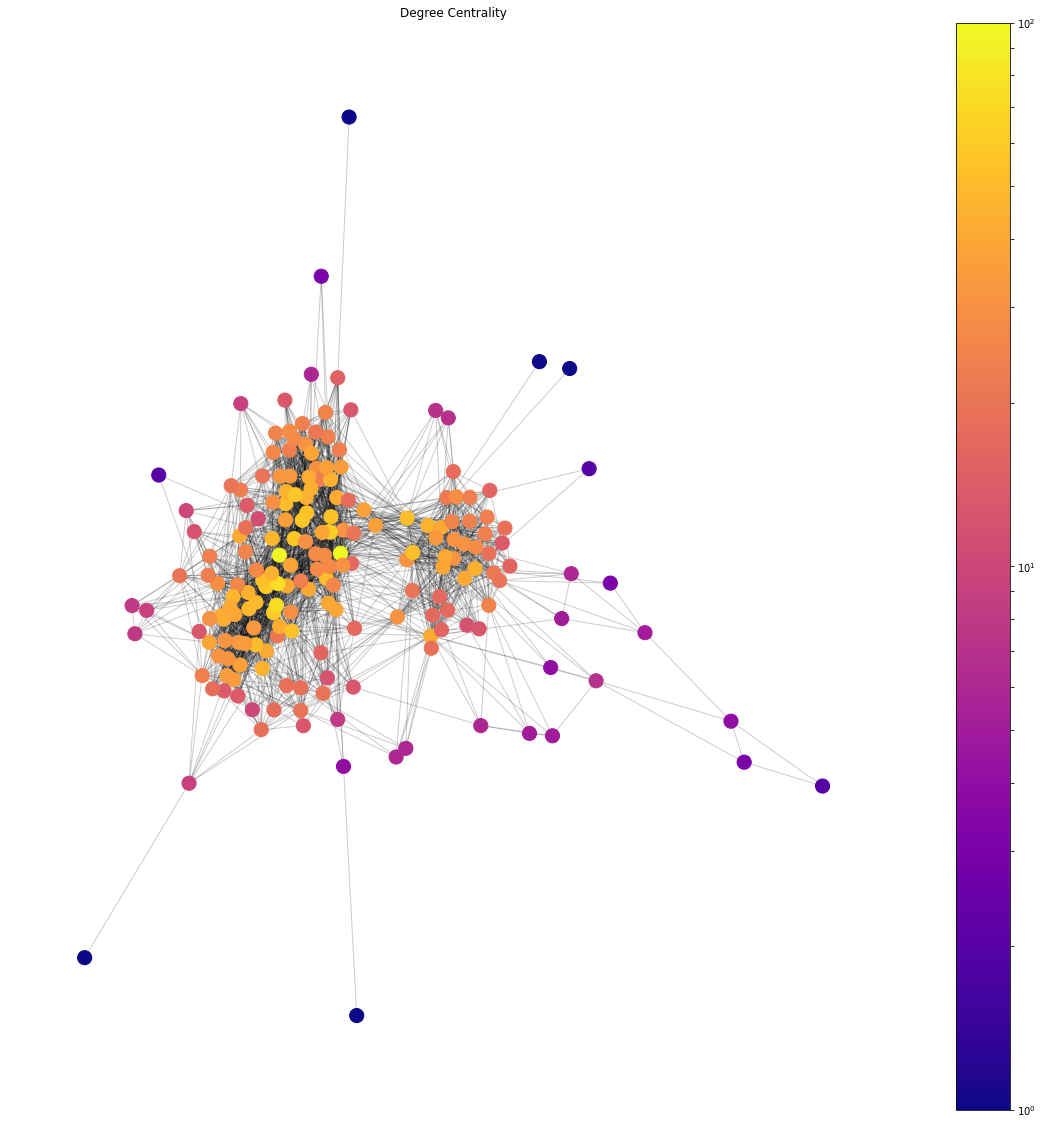

In [107]:
draw(G, pos, grado, 'Degree Centrality')

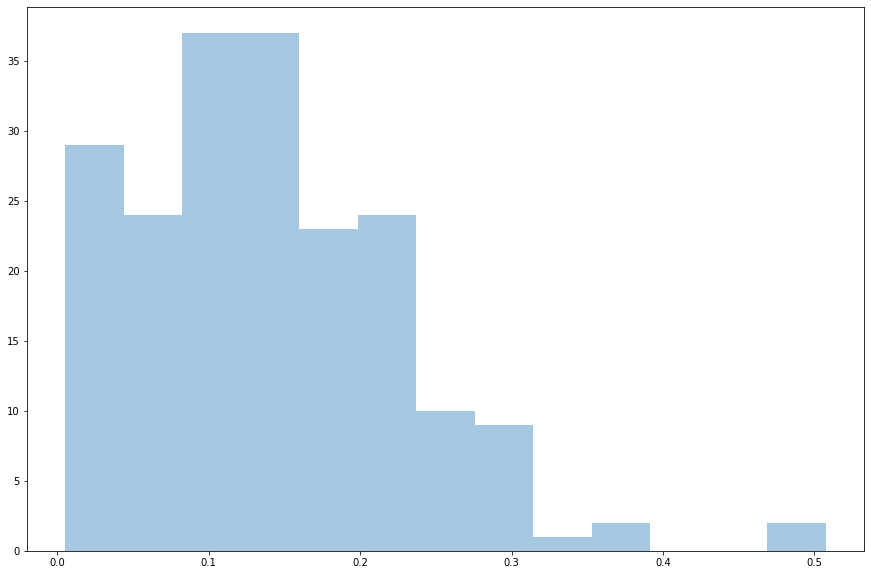

In [115]:
degree = nx.degree_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=False)

### **2.2 Closeness Centrality**


**Farness**: media della lunghezza dei percorsi più brevi verso tutti gli altri nodi

**Closeness**: inversa della Farness (normalizzata per numero di nodi)

In [116]:
closeness = nx.closeness_centrality(G)

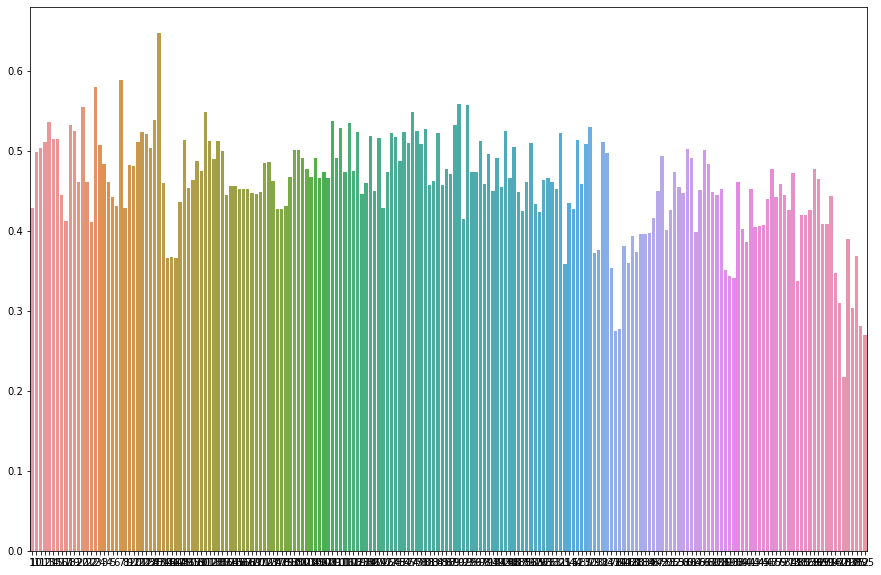

In [128]:
plt.figure(figsize=(15,10))
sns.barplot(x=list(closeness.keys()), y=list(closeness.values()))

In [117]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.6480263157894737),
 ('7', 0.5898203592814372),
 ('23', 0.5811209439528023),
 ('90', 0.5596590909090909),
 ('93', 0.5580736543909348)]

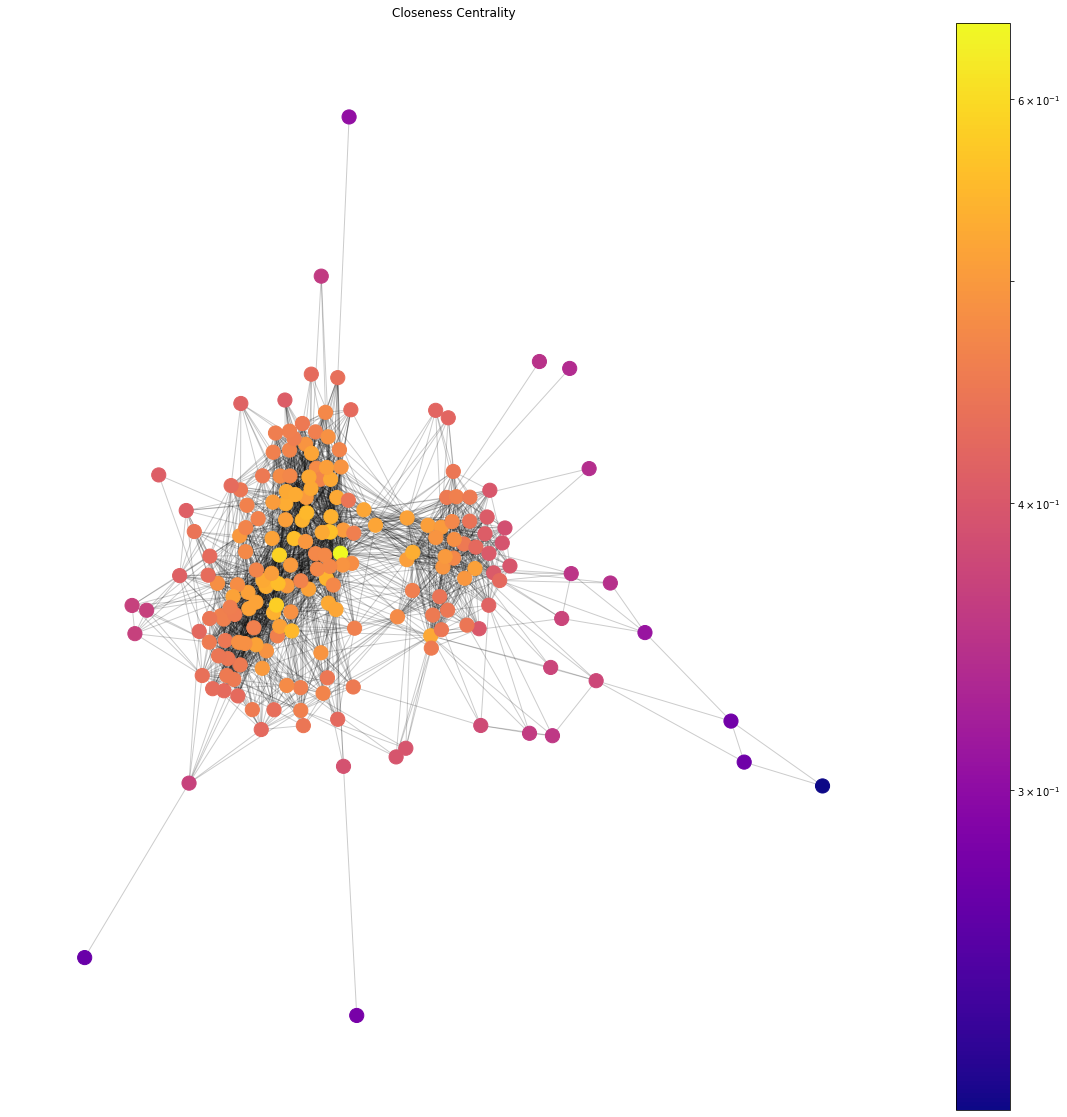

In [120]:
draw(G, pos, closeness, 'Closeness Centrality')

### **2.3 Betweenness Centrality**

Numero di cammini minimi che attraversano un nodo.

**Presupposto**: i vertici importanti sono ponti sui quali fluiscono le informazioni

**In pratica**: se le informazioni si diffondono per cammini minimi, nodi importanti si trovano su molti cammini minimi

In [121]:
betweenness = nx.betweenness_centrality(G)

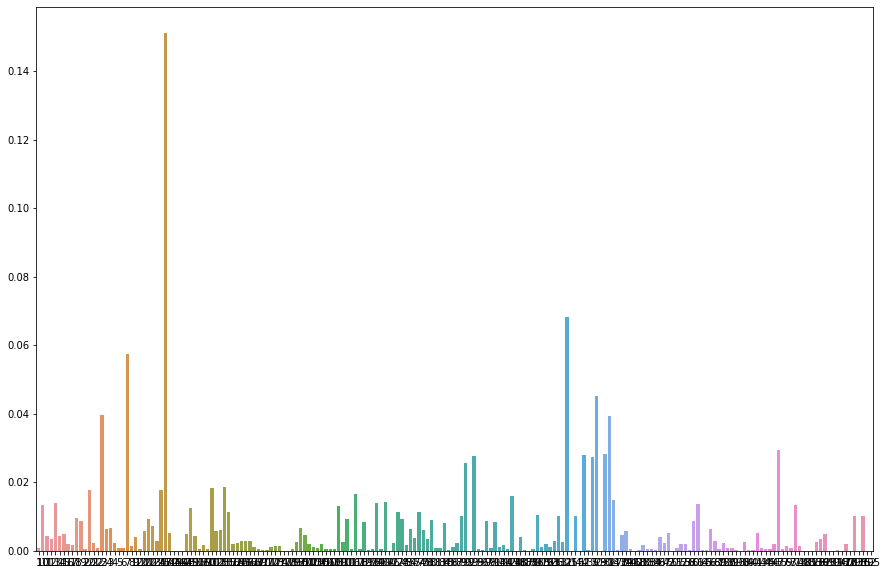

In [126]:
plt.figure(figsize=(15,10))
sns.barplot(x=list(betweenness.keys()), y=list(betweenness.values()))

In [122]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.15105615373941586),
 ('31', 0.06829206963519824),
 ('7', 0.057538917986120146),
 ('70', 0.04517867657801444),
 ('23', 0.03960002124911093)]

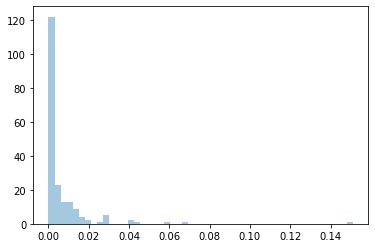

In [127]:
sns.distplot(list(betweenness.values()), kde=False)
#questo per vedere la quantità di nodi con centralità alta e bassa

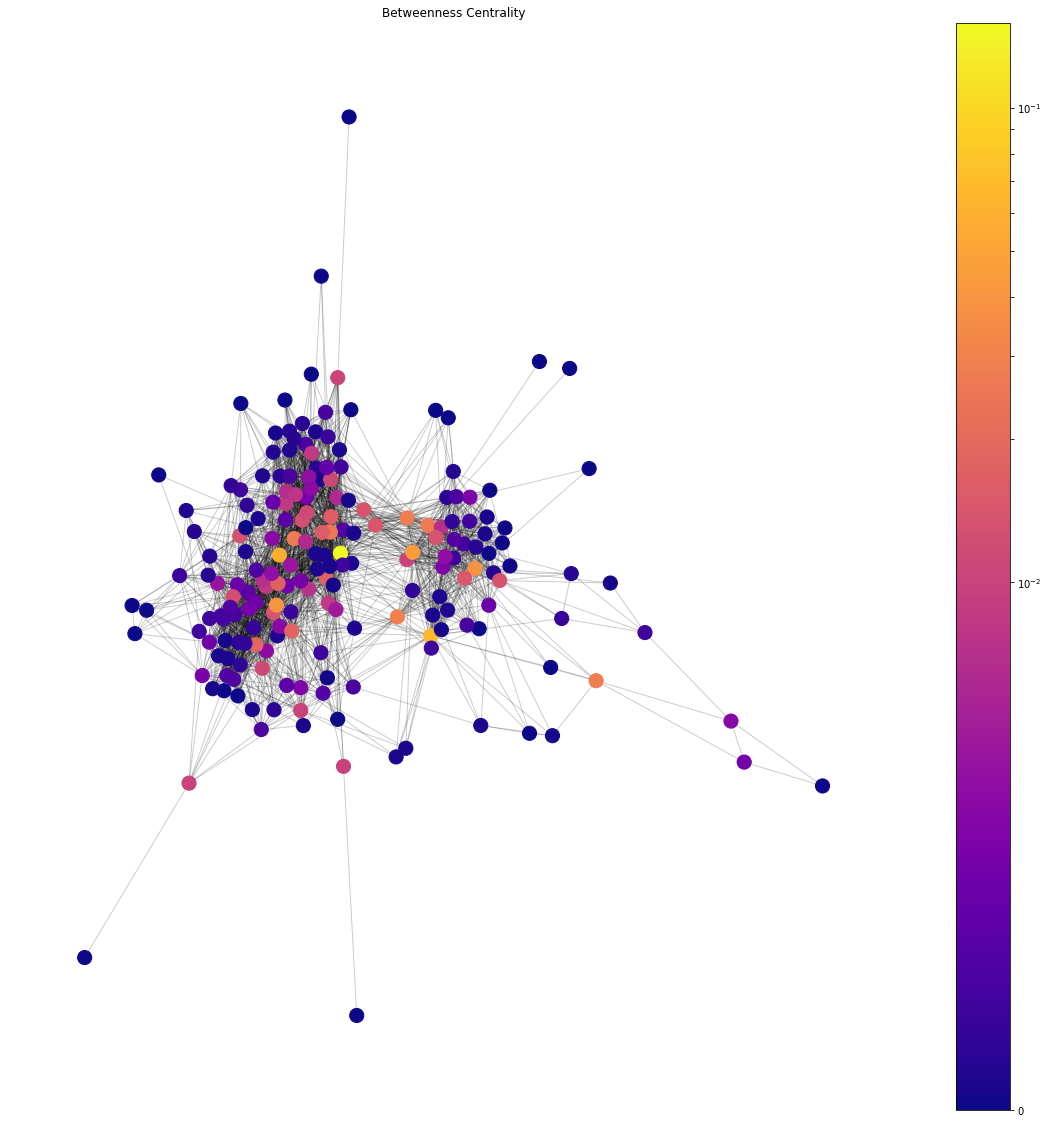

In [123]:
draw(G, pos, betweenness, 'Betweenness Centrality')

### **2.4 Harmonic Centrality**

Media armonica delle distanze geodetiche (percorsi abbreviati) da un dato nodo a tutti gli altri.

In [124]:
harmonic = nx.harmonic_centrality(G)

In [129]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 147.00000000000003),
 ('7', 140.95000000000002),
 ('23', 132.41666666666666),
 ('20', 130.36666666666656),
 ('90', 126.33333333333327)]

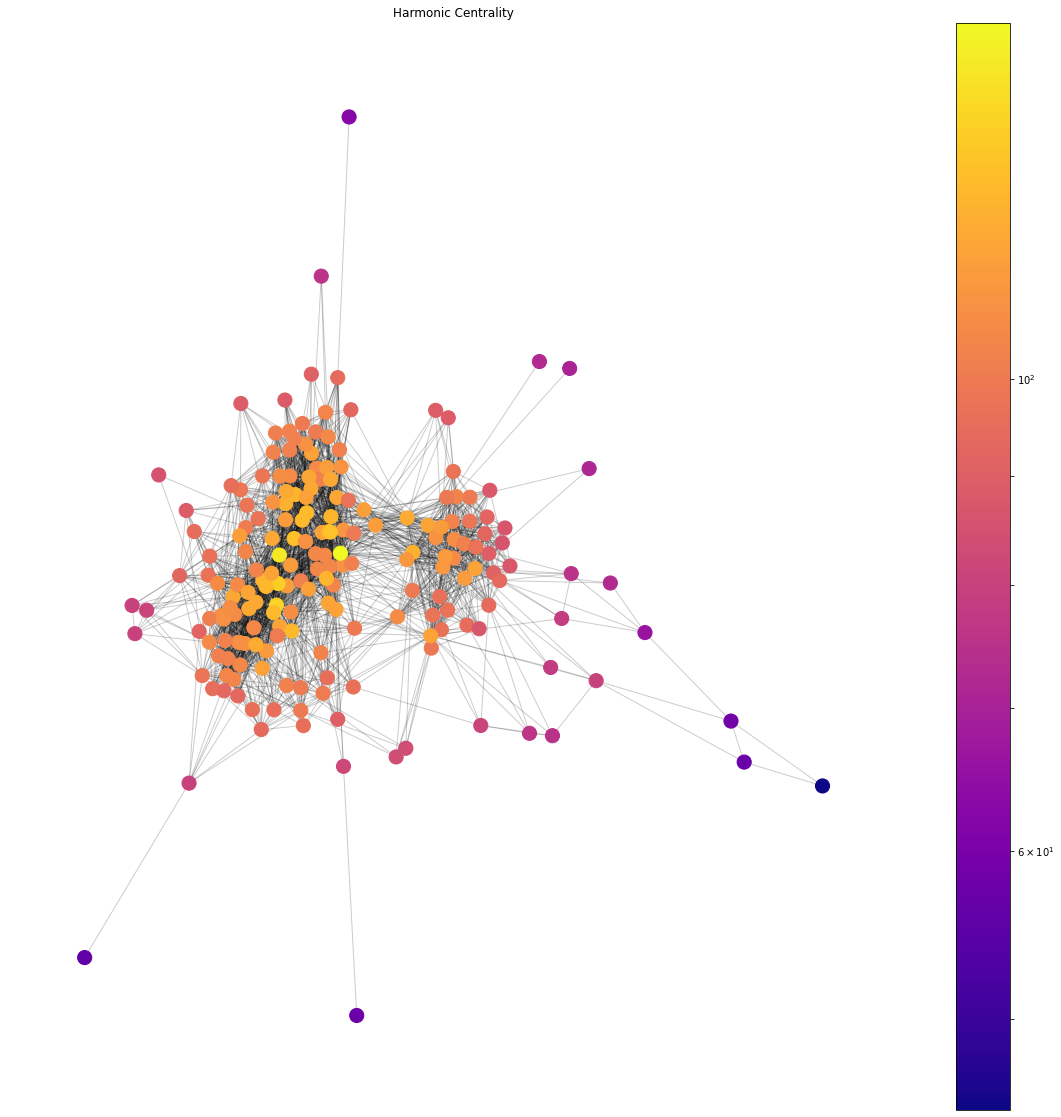

In [130]:
draw(G, pos, harmonic, 'Harmonic Centrality')

### **2.5 Eigenvector Centrality**

Una coppia di autovettore (x) e autovalore (λ) è definita dalla relazione: 
*Ax = λx*
- x è un vettore di dimensione N che può essere interpretato come i punteggi dei nodi
- Ax produce un nuovo vettore della stessa dimensione che corrisponde per ogni nodo alla somma dei punteggi ricevuti dai suoi vicini (neighbors)
- l'uguaglianza implica che i nuovi punteggi siano proporzionali ai precedenti

In [133]:
eigen = nx.eigenvector_centrality(G)

In [134]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('7', 0.210407602557835),
 ('20', 0.18434572268355884),
 ('67', 0.1777740535663636),
 ('23', 0.16687432474667022),
 ('18', 0.15531651037408598)]

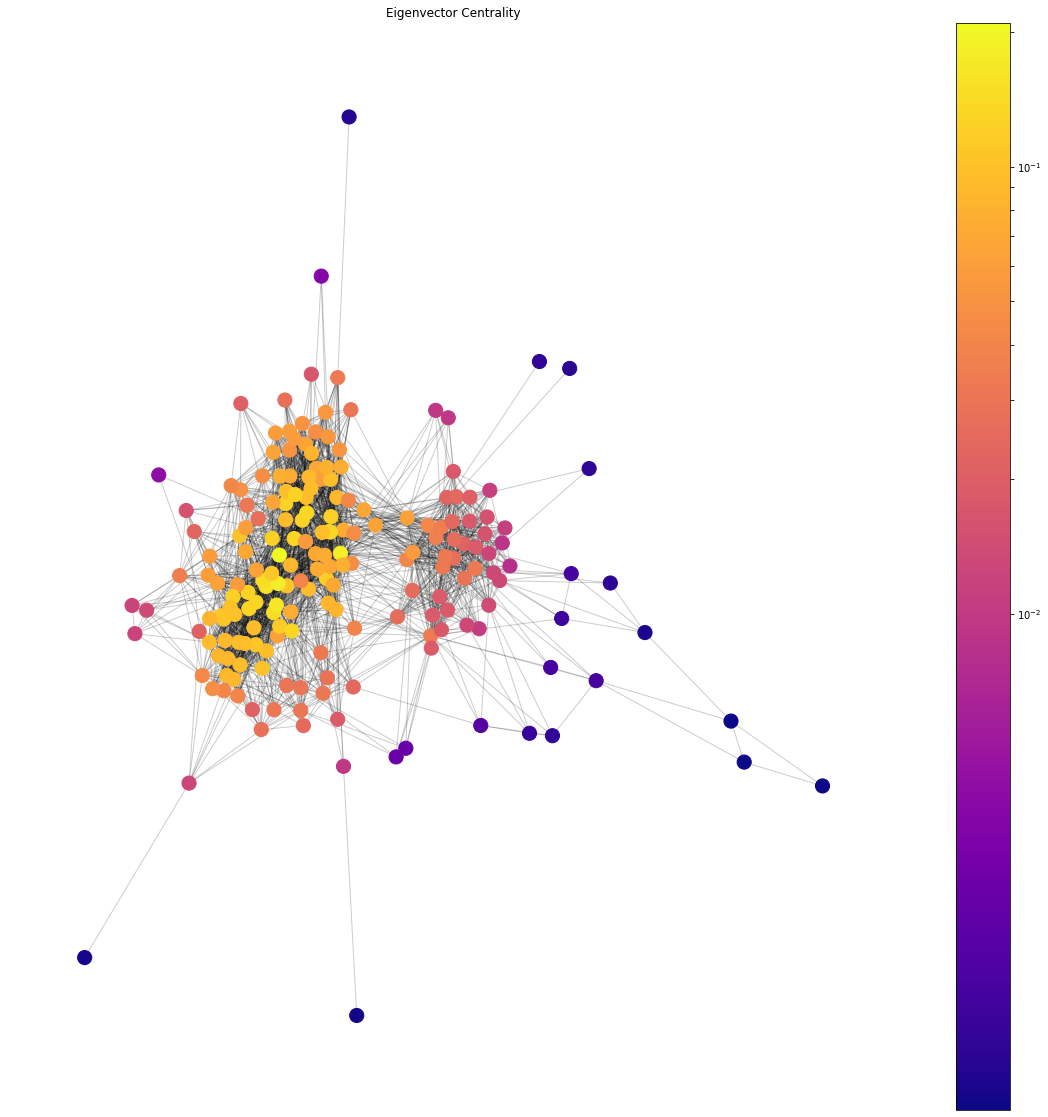

In [135]:
draw(G, pos, eigen, 'Eigenvector Centrality')